In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2a-data"

# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [2]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [3]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
**a)** Create a scatter plot between the independent variable-Previous_Exam_Score and dependent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

In [4]:
if (!requireNamespace("ggplot2", quietly = TRUE)) {
    install.packages("ggplot2")
}
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


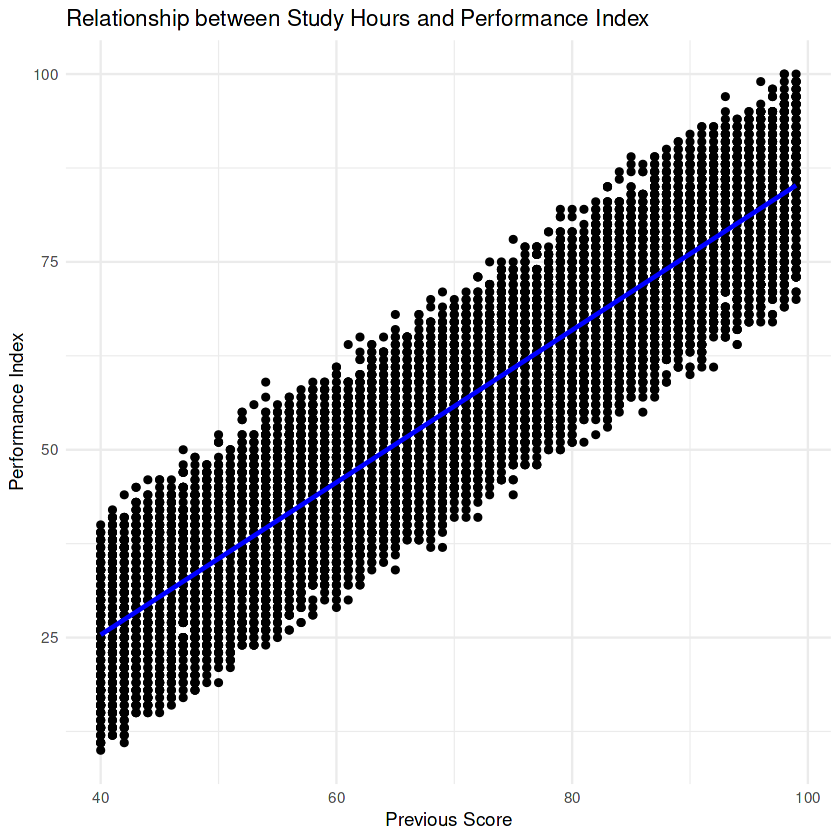

In [5]:
#Write your code here


ggplot(data, aes(x =Previous_Exam_Scores, y =Academic_Performance_Score)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE, color = "blue") +
  labs(title = "Relationship between Study Hours and Performance Index",
       x = "Previous Score",
       y = "Performance Index") +
  theme_minimal()

What do you infer from the graph?  
Ans: There is a linear relationship between Previous Score and Performance index.There is a strong positive correlation between the Previous Score and the Performance Index.
As the Previous Score increases, the Performance Index tends to increase as well.This graph suggests that a student's previous score is a good predictor of their performance index, but it's not a perfect predictor due to the observed variability.

**b)** Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [6]:
#Write your code here
model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores, data = data)
summary(model)


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


**c)** Check if this model follows OLS assumptions.              (3 marks)


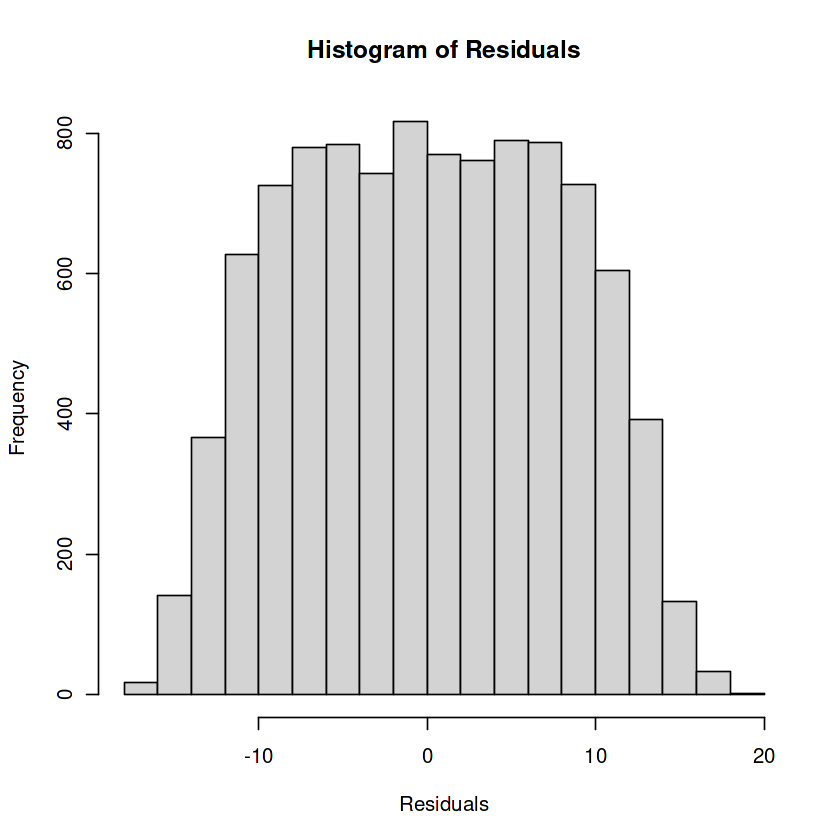

In [7]:
hist(model$residuals, main="Histogram of Residuals", xlab="Residuals")

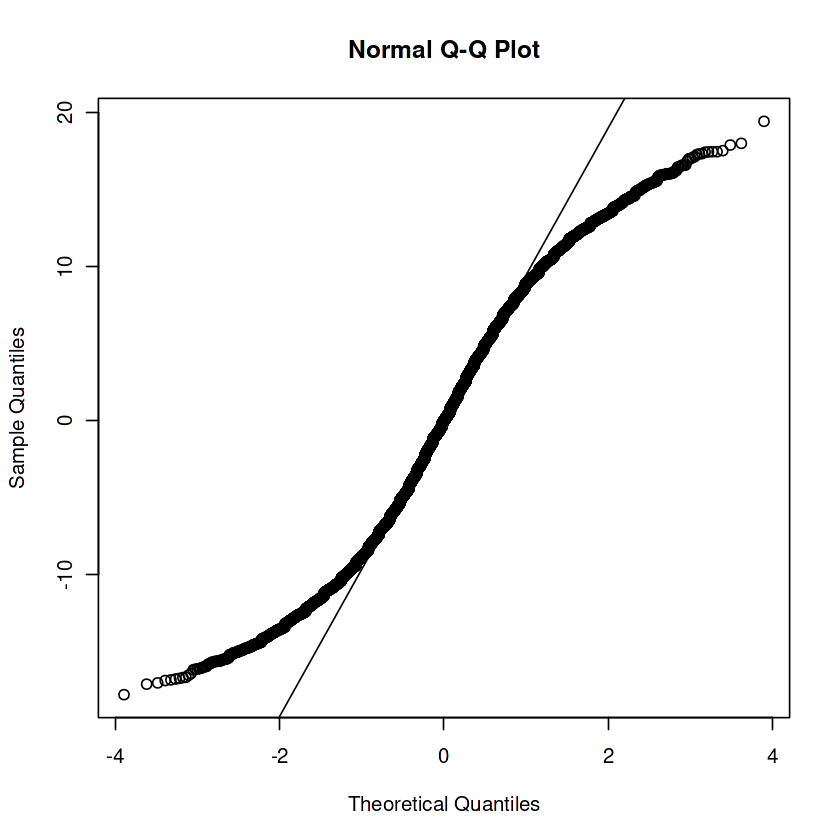

In [8]:
# Q-Q Plot
qqnorm(model$residuals)
qqline(model$residuals)

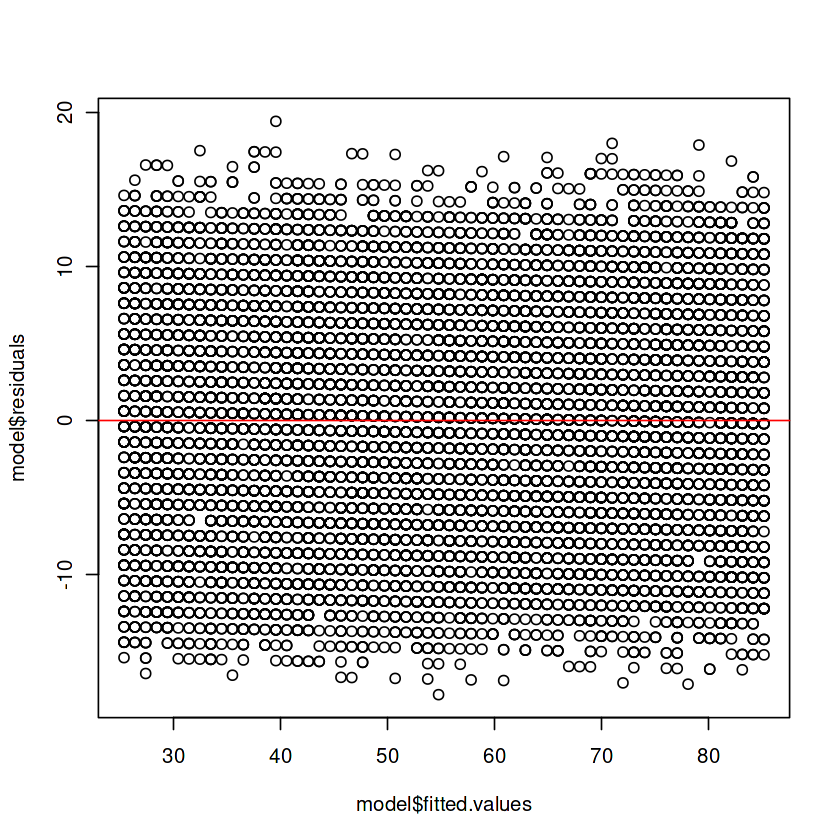

In [9]:
plot(model$fitted.values,model$residuals)
abline(h = 0, col = "red")

Does the model follow OLS assumptions?          
How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?

Ans: Yes the model follows OLS assumptions.
The regression model is linear in regression parameters 
The residuals, ei, follow a normal distribution as we can see from the histogram of residuals and the Q-Q plot.
The  residuals vs. fitted values plot can be used to determine homoscedasticity or heteroscedasticity.From the plot,there is no funnel shape (widening or narrowing of the spread) or other systematic pattern that indicates changing variance.
                  


**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

From the summary of the model,R^2 value is 0.8376,hence approximately  83% is the proportion of variance in the dependent variable that is explained by the model which is pretty good.
To test if modle is statistically significant:
 H0:β1=0 (all regression co-efficients are zero)
 H1:β1≠0 (not all regression co-efficients are zero)
 
 p-value: < 2.2e-16 is much smaller than any common significance level (e.g., 0.05, 0.01).
 Hence we reject the Null hypothesis
 F-statistic: 5.156e+04 indicates a very large F-value
 The F value should always be used along with the p value in deciding whether your results are significant enough to reject the null hypothesis. If you get a large f value, it means something is significant, while a small p value means all your results are significant.

Hence we reject the null hypothesis and the the overall model is statistically significant.
 

### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 


In [10]:
## Before constructing a correlogram, you will have to convert all categorical values to numerical values (Club_Participation column)

data$ Club_Participation <- as.factor(data$ Club_Participation)
data$ Club_Participation<- as.integer(data$ Club_Participation)


## Then proceed to create the correlogram


corrplot 0.92 loaded



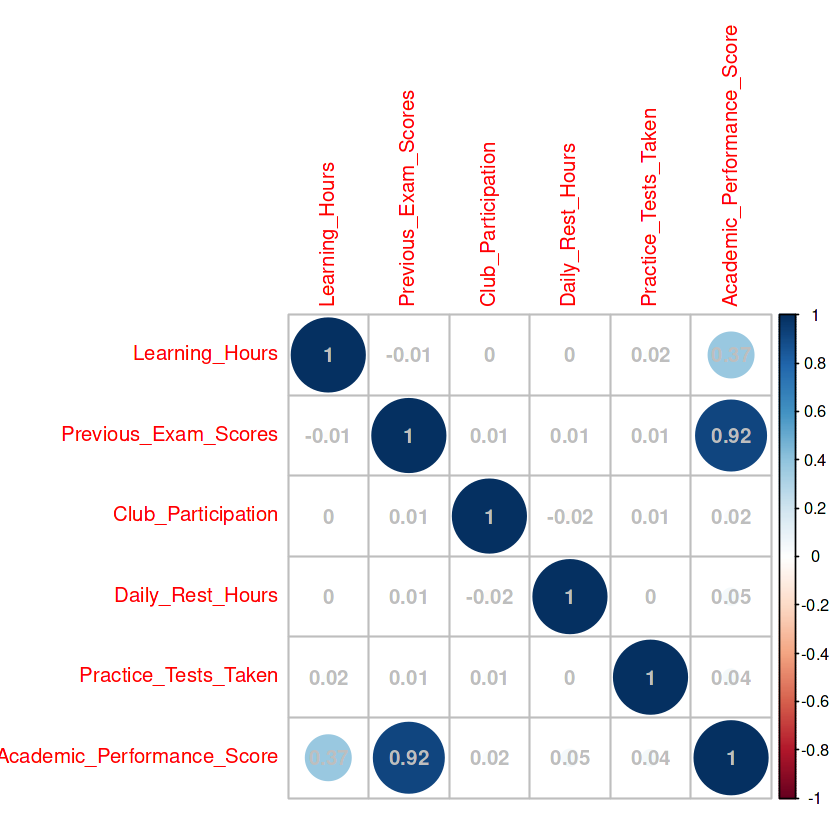

In [11]:
library(corrplot)
library(dplyr)
corr <- cor(data)
corrplot(corr,
         method = "circle", 
         addCoef.col = "grey")


**1**) Use different variables to create the Multiple Linear Regression model. <br>

In [12]:
## Write your code here
model <- lm(Academic_Performance_Score ~Learning_Hours+Previous_Exam_Scores, data = data)
summary(model)



Call:
lm(formula = Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4105 -1.5284 -0.0023  1.5230  9.1603 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -29.816790   0.104529  -285.2   <2e-16 ***
Learning_Hours         2.857637   0.008821   323.9   <2e-16 ***
Previous_Exam_Scores   1.019123   0.001317   773.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.284 on 9997 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9859 
F-statistic: 3.488e+05 on 2 and 9997 DF,  p-value: < 2.2e-16


Is there any correlation between independent variables.Why it is important to do this?




As we can see from the correlation plot of independent variables there is no significant correlation between the independent variables in our dataset(No multicollinearity). If there had been any significant correlation between the given variables, we might have had to drop those correlated variables from our regression analysis.

Which are the most important variables to predict the Performance Index?


 Open to interpretation but choosing Learning_Hours and Previous_Exam_Scores seem to be the most accurate as they are the most correlated to the target variable


**Good job with the analysis!**